<a id='top'></a>

# Homework 3: Normals and More Simulation
***

**Name**: Sahand Setareh

***

This assignment is due on Canvas by **11:59 PM on Friday March 13**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | 

---

In [2]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pylab as plt
%matplotlib inline

<br>

---
<a id='p1'></a>
[Back to top](#top)

<img src="https://media.daysoftheyear.com/20171223112636/hedgehog-day1.jpg" style="width: 500px;"/>


### [25 points] Problem 1

Suppose you are modeling the probability of observing various levels of cuteness in hedgehogs you encounter.  Let $X$ be a random variable representing the observed cuteness, which is *obviously* nonnegative and has units of deci*awws*. You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         k \ x \ e^{\left(-\frac{x^2}{8}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $k$ is some normalizing constant.


**Part A**: Determine the value of $k$ such that $f(x)$ is a valid probability density function. Compute this by hand. Then use Python to make a plot of the probability density function for hedgehog cuteness, $f(x)$. Be sure to label your plot and axes!

Our value for $k$ must be selected such that the integration of our function should equate to 1. 

$$ \int_{0}^{\infty}kxe^{-\frac{x^2}{8}}dx = 1 $$

$$ k\int_{0}^{\infty}xe^{-\frac{x^2}{8}}dx = 1 $$

Using a substitution where $u = x^2$ and $du = 2xdx$, we can integrate the function:

$$ k\int_{0}^{\infty}xe^{-\frac{x^2}{8}}dx = 1 \implies k\int_{0}^{\infty}\frac{2}{2}xe^{-\frac{x^2}{8}}dx = 1 \implies \frac{k}{2}\int_{0}^{\infty}e^{-\frac{u}{8}}du = 1$$

$$\frac{k}{2}\int_{0}^{\infty}e^{-\frac{u}{8}}du = 1 \implies \frac{-8k}{2}e^{-\frac{u}{8}}\Big|_0^\infty = 1$$

$$-4ke^{-\frac{u}{8}}\Big|_0^\infty = 1 \implies -4k(e^{-\frac{\infty}{8}} - e^{-\frac{0}{8}}) = 1 \implies -4k(0-1) = 1$$

$$-4k(0-1) = 1 \implies 4k = 1 \implies k = \frac{1}{4} $$

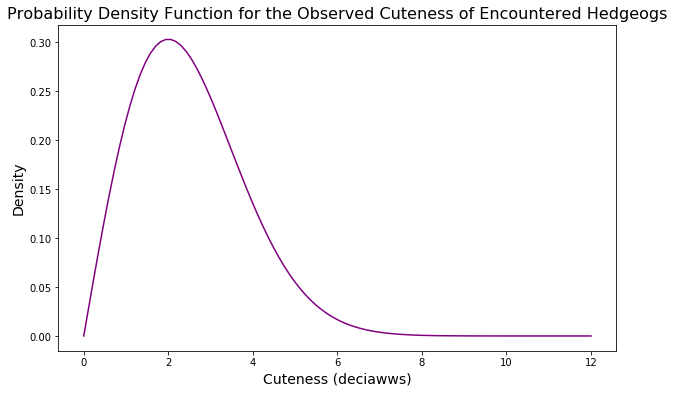

In [3]:
# x-axis
samples = np.linspace(0, 12, 100)

# f(x) as a probability density function
def pdf(samples):
    x = 1/4 * samples * np.exp(-(samples**2/8))
    return x

# Plotting x-axis vs our y-axis'pdf'
plt.figure(figsize = (10,6))
plt.plot(samples, pdf(samples), color = 'purple')

# Graph info
plt.title('Probability Density Function for the Observed Cuteness of Encountered Hedgeogs', fontsize = 16)
plt.xlabel('Cuteness (deciawws)', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

plt.show()

**Part B**: Compute *by hand* the cumulative density (cdf) function $F(x)$ for $X$ and provide the value of $F(2)$. You may use Python as a calculator, but make sure to set up the work by hand.

$$ F(x) = \int_{0}^{x}f(y)dy $$

$$F(X) = \int_{0}^{x}\frac{1}{4}ye^{-\frac{y^2}{8}}dy$$

$$F(X) = \frac{1}{4}\int_{0}^{x}ye^{-\frac{y^2}{8}}dy$$

Using the substitution $u = y^2$ and $du = 2ydy$, we can integrate the function:


$$F(X) = \frac{1}{4}\int_{0}^{x^2}\frac{2}{2}ye^{-\frac{y^2}{8}}dy \implies F(X) = \frac{1}{4}\frac{1}{2}\int_{0}^{x^2}e^{-\frac{u}{8}}du \implies F(X) = \frac{1}{8}\int_{0}^{x^2}e^{-\frac{u}{8}}du \implies F(X) = -\frac{8}{8}e^{-\frac{u}{8}}\Big|_0^{x^2}$$

$$F(X) = -\frac{8}{8}e^{-\frac{u}{8}}\Big|_0^{x^2} \implies F(X) = -1(e^{-\frac{x^2}{8}} - e^{-\frac{0}{8}}) \implies F(X) = -1(e^{-\frac{x^2}{8}} - 1) \implies F(X) = 1 - e^{-\frac{x^2}{8}}$$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median ($\tilde{x}$) cuteness of all hedgehogs. You may use Python as a calculator, but make sure to set up the work by hand.

$$F(\tilde{x}) = 1 - e^{\frac{\tilde{x}^2}{8}} = \frac{1}{4}$$

$$e^{\frac{\tilde{x}^2}{8}} = \frac{1}{4} \implies -\frac{\tilde{x}^2}{8} = -ln4 \implies \tilde{x}^2 = 8ln4 $$

$$\tilde{x} = \sqrt{8ln4} \approx 3.330$$

In [22]:
print('The median cuteness is: ' + str(np.sqrt(8 * np.log(4))))

The median cuteness is: 3.3302184446307908


**Part D**: It is a well-known fact that any hedgehog whose cuteness exceeds 3 deciawws is **totes adorbz**. Use the cdf you computed in **Part B** to find the probability that any arbitrary hedgehog that you observe is totes adorbz. You may use Python as a calculator, but make sure to set up the work by hand.

$$P(X \geq 3) = 1 - P(X \leq 3)$$

$$P(X \geq 3) = 1 - (1 - e^{\frac{-3^2}{8}}) = e^{\frac{-9}{8}} \approx 0.325 $$

In [23]:
print("The probability that any arbitrary hedgehog is totes adorbz: " + str(1 - (1 - np.exp(-9/8))))

The probability that any arbitrary hedgehog is totes adorbz: 0.32465246735834974


**Part E:** You have been painstakingly collecting data on hedgehogs all over town, and the cuteness is damn near overwhelming. Suppose you sample 7 hedgehogs, and the cuteness of any given hedgehog is independent of the cuteness of all other hedgehogs. What is the probability that at least 3 but not all of them are totes adorbz? You may use Python as a calculator, but make sure to set up the work by hand.

We can observe a binomial distribution with the values of $n = 7$ and $p = P($Being totes adorbz $) = e^{\frac{-9}{8}} \approx 0.325 $

$$ P(3 \leq X \leq 7) = \sum_{k = 3}^{6} {7 \choose k}(e^{\frac{-9}{8}})^k(1 - e^{\frac{-9}{8}})^{7 - k} = 0.40897669148564136 $$

In [24]:
result  = 0
for k in range(3, 7):
    result += (np.math.factorial(7) / (np.math.factorial(k) * (np.math.factorial(7 - k)))) * (np.exp(-9/8)**k) * ((1 - np.exp(-9/8))**(7 - k))


print("The probability that at least three but not all seven hedgehogs are totes adorbz: " + str(result))

The probability that at least three but not all seven hedgehogs are totes adorbz: 0.40897669148564136


<br>

---
<a id='p2'></a>
[Back to top](#top)
### [25 points] Problem 2 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised sine probability density function:

$$
f(x) = \begin{cases}
         \dfrac{1}{2\pi}\left(\sin{(x)} + 1\right) & 0 \leq x \leq 2\pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $2\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \pi$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

$$\int_{0}^{\pi}\frac{1}{2\pi}(\sin(x) + 1)dx = \frac{1}{2\pi}(-cos(x) + x)\Big|_0^{\pi}$$

$$\frac{1}{2\pi}(-cos(x) + x)\Big|_0^{\pi} = 
\frac{1}{2\pi} * (-cos(\pi)+\pi) - (-cos(0) + 0) 
= \frac{1}{2\pi}(1 + \pi - (-1 + 0)) = \frac{2 + \pi}{2\pi} = 0.818309886184 $$

We can interperate the result as the probability that a random variable lies between the values $0 \leq X \leq \pi$

**Part B.** Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

This value estimates the amount of the area that falls within the box and underneath the curve of $f(x)$

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

Because we have a proportion of the total area underneath the curve, we can multiply this value by the total area which is $ \frac{\pi}{2} $

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $2\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [25]:
# f(x)
def sin(x):
    return (np.sin(x) + 1) / (2 * np.pi)

# Integrating f(x)
def integrate(num_samples, ub, isPlot):
    x = np.random.uniform(0, ub, num_samples)
    y = np.random.uniform(0, 1, num_samples)
    
    function = sin(x)
    randomVar = y < function
    estimate = ub * np.sum(randomVar) / num_samples
    sampleVar = np.var(randomVar)
    
# Parameter that determines if we plot or not    
    if isPlot:
        fig, ax = plt.subplots(nrows = 1, figsize = (16, 8))
        xValue = np.arange(0, 2 * np.pi, 2 * np.pi / 100)
# Line plot of f(x)
        ax.plot(xValue, sin(xValue), color = 'purple')
    
# Scatter plot of values below f(x)
        ax.scatter(x[y <= function], y[y <= function], color = 'red', alpha = 0.5)
    
# Scatter plot of values above f(x)
        ax.scatter(x[y > function], y[y > function], color = 'steelblue', alpha = 0.5)
    return estimate, sampleVar

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=`$2\pi$? Set that as `int_0_to_2pi` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test is stochastic, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

In [26]:
int_0_to_0 = 0 # fill this in!
int_0_to_2pi = 1 # this one too!


#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
assert integrate(1000, 0, False)[0] == int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, 2 * np.pi, False)[0], int_0_to_2pi, abs_tol=0.03), "Error: upper endpoint test failing"

**Part F.** Run your simulation with `isPlot=True` and `ub=`$\pi$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**? 

(0.8419468311620646, 0.196176)


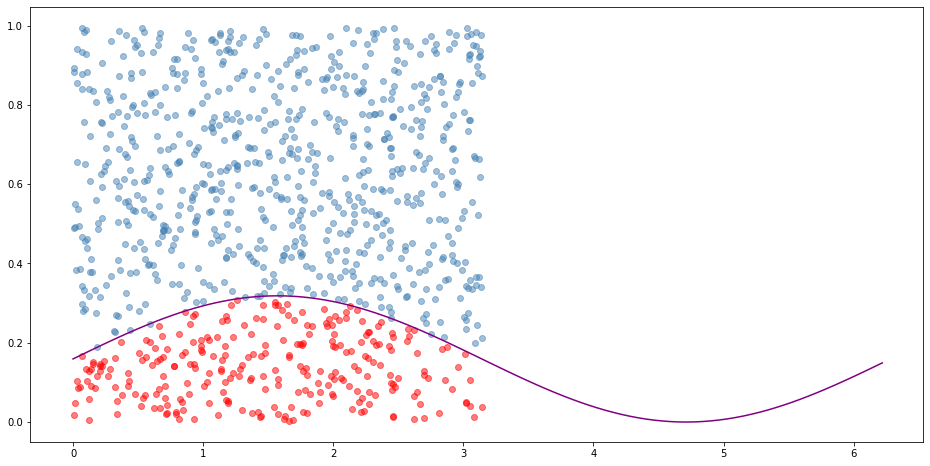

In [27]:
simulation = integrate(1000, np.pi, isPlot = True)
print(simulation)

In [28]:
simulation2 = integrate(20000, np.pi, isPlot = False)
print(simulation2)

(0.819641523321577, 0.19283119)


Running the simulation with at least 20,000 samples did yield a value of 0.819 for the integral, which is very close to the value we calculated earlier of 0.818.

<br>

---
<a id='p3'></a>
[Back to top](#top)
### [25 points] Problem 3 - Mmmm... Donuts...

<img src="http://astrokentico.s3.amazonaws.com/rojakdaily/media/1nichoras/homer%20simpson%20krispy%20kreme/main.jpg?ext=.jpg" style="width:300px;"/>

You bring many donuts to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [190 mSv (millisievert)](https://en.wikipedia.org/wiki/Sievert), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 178 mSv of radiation, with a standard deviation of 65 mSv. For the test (to see if the donuts must be thrown away) you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. Assume you bought 245 donuts. 

**Part A:** What type of sample is this? What is the sample and what is the size of it? What is the sample space?

This is a systematic sample. The sample is every five donuts of the 245 donuts we bought, which has a size of 49. The sample space is the level of radiation of each donut, which ranges from 115 mSv to 243 mSv. 

**Part B:** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python. But feel free to use python to actually do the calculations. You ***should*** use Python to retrieve critical values of a standard normal random variable (using a Z chart is so old school!). 

Via Central Limit Theorem, we can observe $\bar{X} ~ N(\mu, \frac{\sigma^2}{n})$

$\mu = 178 $, $\sigma = 65$, $n = 49$

$ P(\bar{X} > 190) = P(Z > \frac{190 - 178}{\frac{65}{\sqrt{49}}}) = P(Z > 1.29) = 1 - P(Z \leq 1.29) = 1 - \Phi(1.29) = 0.098125$

In [29]:
print ("The probability that a donut batch is unsafe: " + str(1 - stats.norm.cdf(x=190, loc=178, scale=65/7)))

The probability that a donut batch is unsafe: 0.09812530455152912


**Part B.** Yikes! Seems like those donuts might be dangerous, but you really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the maximum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.02?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

By the Central Limit Theorem, we can calculate $P(\bar{X} > 190) \leq 0.02$

$$P(\bar{X} > 190) = P(Z > \frac{190 - \mu}{\frac{\sigma}{\sqrt{49}}}) = 1 - P(Z \leq \frac{190 - \mu}{\frac{\sigma}{\sqrt{49}}}) = 0.02$$

We desire a critical value for Z so that: 
$$P(Z \leq \frac{190 - \mu}{\frac{\sigma}{\sqrt{49}}}) = 0.98$$

In [30]:
criticalVal = stats.norm.ppf(0.98)
criticalVal

2.0537489106318225

Solving for the mean $\mu$ using the critical value found above:

$$Z = \frac{190 - \mu}{\frac{\sigma}{\sqrt{49}}} \implies \mu = 190 - Z \cdot \frac{\sigma}{\sqrt{49}} = 190 - 2.05 \cdot \frac{65}{7} \approx 170.929$$ 

In [31]:
# Verifying our calculations
mu = 190 - stats.norm.ppf(0.98) * (65 / 7)
mu

170.92947440127594

**Part C.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.02. However, she knows a different bakery that might be the solution. At Johnny's Super Consistent Baked Goods Emporium all the donuts are exactly the same in size, which means they are closer to being exactly the same in radiation content (less deviation). Suppose the mean and sample size remain unchanged. What is the largest standard deviation to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

$$P(Z > \frac{190 - 178}{\frac{\sigma}{\sqrt{49}}}) = 1 - P(Z \leq \frac{190 - 178}{\frac{\sigma}{\sqrt{49}}}) = 0.02$$

$Z = 2.05$ (critical value we calculated earlier)

Solving for $\sigma$, we get:

$$Z \leq \frac{190 - 178}{\frac{\sigma}{7}} \implies \sigma \leq \frac{7 \cdot 12}{2.05} = 40.90$$

In [32]:
# Verifying our calculations
maximumStd = 84 / stats.norm.ppf(0.98)
maximumStd

40.90081293051444

**Part D:** Since donuts of differant diameters absorb differant amounts of radiation it is easy to model the standard deviation of radiation content in terms of the standard deviation in donut size. Assume the function $RD$ below takes in the standard deviation in millimeters of donut diameter $(\sigma_d)$, and gives the radiation deviation in mSv.

$\begin{align}
    RD(\sigma_d) = \frac{5^{\sigma_d} \times 1mSv}{6mm}
\end{align}$

Johnny's bakes according to the following $\textit{"mathmatically"}$ correct donut size:

<img src="http://www.conquermaths.com/news/images/decinfo.jpg" style="width:300px;"/>

So they strive for a donut diameter of 72 - 82 mm, with less than 5mm of standard deviation. However, we're not taking their word for it. We've taken a sample of ***36*** donuts from Johnny's to determine if their low standard deviation satisfies our requirement of less than $0.02$ chance that we throw away our donuts. The observed standard deviation in donut size was 2.8mm. Assume that the mean radiation remains unchanged from the other donuts. Do Johnny's donuts satisfy our requirement of less than $0.02$ chance that we throw them away? As per above, set up your equation in Markdown, then use python as a calculator / to retrieve standard normal values. 

$$\sigma = \frac{5^{\sigma_d}}{6}, n = 36, \sigma_d = 2.8$$

$$P(\bar{X} > 190) = 1 - P(Z \leq \frac{190 - 178}{\frac{\frac{5^{\sigma_d}}{6}}{\sqrt{36}}}) = 1 - P(Z \leq \frac{190 - 178}{\frac{\frac{5^{2.8}}{6}}{\sqrt{36}}}) = 1 - P(Z \leq 2.516596) \approx 9.287 \cdot 10^{-7}$$

In [33]:
# Verifying our calculations
z = 12 / ((5**2.8 / 6) / 6)
johnnyDonuts = (1 - stats.norm.cdf(z))
johnnyDonuts

9.287242271893703e-07

We can see the Johnny's Donuts DO satisfy the requirements, because the probability that the donuts are rejected are $\approx 9,287 \cdot 10^{-7}$, which is smaller than the desired chance of 0.02 that we throw away our donuts

**Part E.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts? Think about a really wide standard deviation, and a way smaller mean (say $\mu = 2$). 

Using a normal distribution with a wide standard deviation or an incredibly low mean would result in a negative value for some of our probabilities, which is not realistic. 

<br>

---
<a id='p4'></a>
[Back to top](#top)

##  [25 points] Problem 4 - CDF Inversion Sampling

In notebook 12, we looked at one method many pieces of statistical software use to turn pseudorandom numbers coming from the $U(0,1)$ distribution into those with a normal distribution.  In this problem we examine another such method.

**Part A:** Simulating an Exponential

i ) The exponential distribution has pdf $f(x)= \lambda e^{-\lambda x}$ for $x\ge 0$.  Use the following markdown cell to compute by hand the cdf of the exponential.

$$F(x) = \int_{0}^{x}\lambda e^{-\lambda x} = e^{-\lambda t}\Big|_0^x = 1 - e^{-\lambda x}, x \in (0,1)$$

ii) The cdf is a function that takes x-values(or times, in the case of the exponential) and returns probabilities as the y-values.  Specifically, it returns the probability of a random variable X being less than or equal to some x value($P(X \leq x)$).  Find the *inverse* of this function, that takes the probability as the the input and returns times(x-values).

$F(x) = 1 - e^{-\lambda x}$

Finding the inverse of $F(x)$: 

$$x = 1 - e^{-\lambda y}$$

$$x -1 = e^{-\lambda y}$$

$$ln(x - 1) = ln(e^{-\lambda y})$$

$$ln(x - 1) = -\lambda y$$

$$y = -\frac{ln(x-1)}{\lambda}$$

$$F^{-1}(x) = -\frac{ln(x-1)}{\lambda}$$


iii) Simulate 1000 random $U(0,1)$ variables.  Since these are numbers in $[0,1]$, we could think of them as random *probabilities*.  Plug these *probabilities* into the function you found in part ii), then plot a histogram of the results.  Overlay the theoretical density of the exponential.  For each of these, use $\lambda=1/8$.

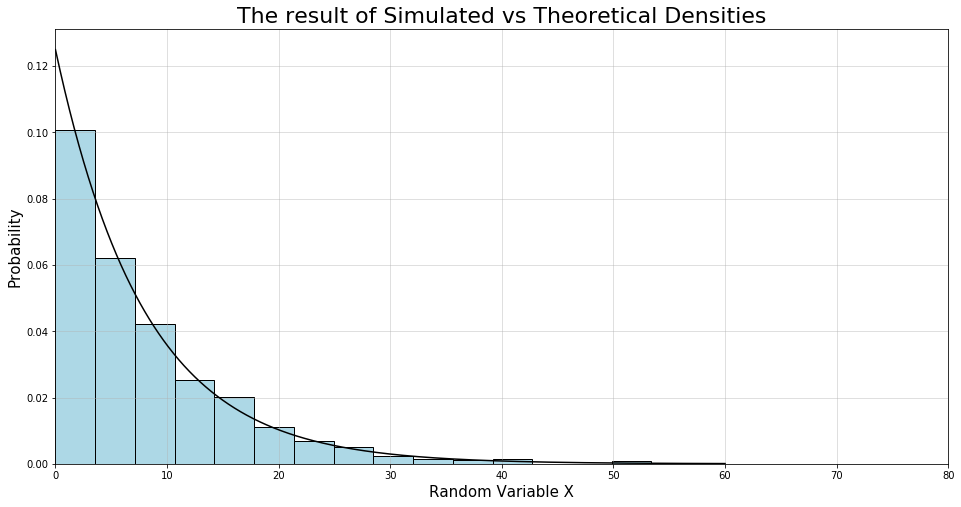

In [35]:
# Uniform random variables 0 or 1 with 1000 random samples
randomVars = np.random.uniform(0, 1, 1000)

# List to hold values of F**-1(x)
inverseVals = []

for i in range(len(randomVars)):
    inverseVals.append((np.log(1 - randomVars[i]))/(-1/8))

# x-axis
xlines = np.linspace(0, 60, 1000)

# List to hold the theoretical density of the exponential 
theoreticalExp = []

for i in range(len(xlines)):
    theoreticalExp.append((1/8) * np.exp(-xlines[i]/8))

# Plot info
fig, ax = plt.subplots(figsize = (16,8))

ax.grid(True, alpha = 0.5)
ax.set_title("The result of Simulated vs Theoretical Densities", fontsize = 22)

ax.set_ylabel("Probability", fontsize = 15)
ax.set_xlabel("Random Variable X", fontsize = 15)

ax.set_xlim([0, 80])
plt.hist(inverseVals, density = True, bins = 15, color = 'lightblue', edgecolor = 'black')
plt.plot(xlines, theoreticalExp, color = 'black')

**Part B:** Simulating a new distribution

i) Consider a continuous random variable X given by $f(x)=\frac{\cos(x)}{2}$ for $x \in [\frac{-\pi}{2}, \frac{\pi}{2}]$.  Find the cdf and inverse cdf of X.

$$F(x) = \int_{-\frac{\pi}{2}}^{x}\frac{cos(t)}{2}dx = \frac{1}{2}sin(t)\Big|_{-\frac{\pi}{2}}^x = \frac{sin(x) + 1}{2}$$

$$x = \frac{sin(y) + 1}{2} \implies 2x = sin(y) + 1 \implies sin^{-1}(2x - 1) = y$$

$$F^{-1}(x) = sin^{-1}(2x - 1)$$

ii) Simulate draws from X by simluating 1000 $U[0,1]$ random variables, use them as random *probabilities* and plug them into the inverse cdf you just found.  As in part a), plot a histogram of the random variables(x) derived from the inverse cdf against their density function.

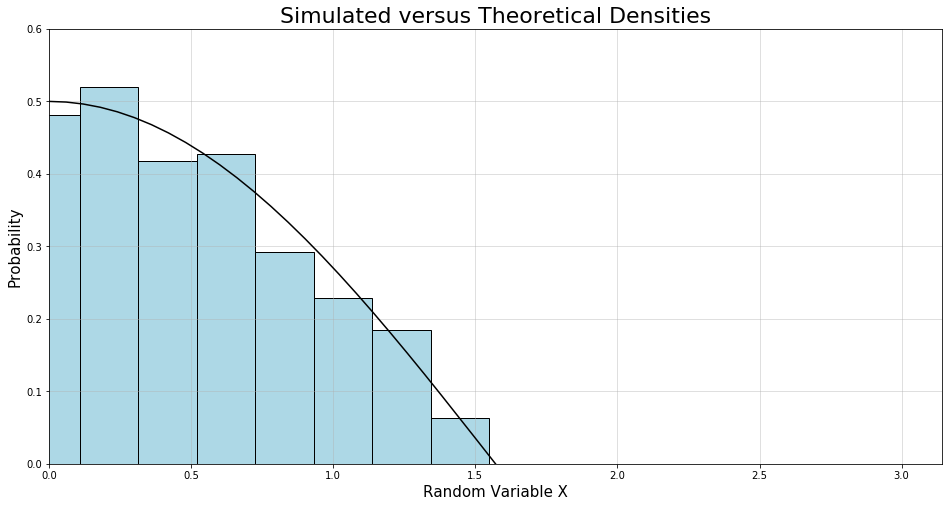

In [36]:
# Uniform random variables 0 or 1 with 1000 random samples
randomVars = np.random.uniform(0, 1, 1000)

# List to hold values of F**-1(x)
inverseVals = []

for i in range(len(randomVars)):
    inverseVals.append(np.arcsin(2 * randomVars[i] - 1))

# x-axis
xlines = np.linspace(0, 60, 1000)

# List to hold values of f(x)
cosFun = []

for i in range(len(xlines)):
    cosFun.append(np.cos(xlines[i]) / 2)
# Plotting info
fig, ax = plt.subplots(figsize = (16, 8))
ax.grid(True, alpha = 0.5)

ax.set_title("Simulated versus Theoretical Densities", fontsize = 22)
ax.set_xlabel("Random Variable X", fontsize = 15)
ax.set_ylabel("Probability", fontsize = 15)

ax.set_xlim([0, np.pi])
ax.set_ylim([0, .6])

plt.hist(inverseVals, density = True, bins = 15, color = 'lightblue', edgecolor = 'black')
plt.plot(xlines, cosFun, color = 'black')
plt.show()

**Part C:** Generalizing

Describe in words how this process might work on a discrete random variable.  You may use the Bernoulli as an example, if you wish.

We can observe that $x$ has a continuous cumulative distribution function denoted $f(x)$. Via Bernroulli, we assign a value of 1 to the probability $P$ and a 0 to the probability $1-P$. This is to say, we have a Bernoulli PMF that has discrete random variables which are 1 or 0, but our Bernoulli CDF is a continuous function that represents the probability of the random variables at 0 vs the probability of the random variables at 1, continuously, where the behavior of the function between 0 and 1 would be that of a straight line, and when integrated the value of the Bernoulli CDF $f(x)$ is 1. 